# DrivenData - Genetic Engineering Attribution Challenge
#### Jim set up Benchmark 12-07-2020/Vanessa added dataset links 12-10-2020

In [1]:
### Import Libraries

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

print("Libraries Loaded")

Libraries Loaded


## 100 Read Data

In [2]:

train_values = pd.read_csv('https://www.dropbox.com/s/3atnfvr65oh0y4y/train_values.csv?dl=1', index_col='sequence_id')
train_labels = pd.read_csv('https://www.dropbox.com/s/71yg5f3dbc4h2yd/train_labels.csv?dl=1', index_col='sequence_id')
test_values  = pd.read_csv('https://www.dropbox.com/s/4g1astwaccer5lz/test_values.csv?dl=1' , index_col='sequence_id')

train_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 110 Explore the Training Data

In [6]:
train_values.dtypes

sequence                                 object
bacterial_resistance_ampicillin         float64
bacterial_resistance_chloramphenicol    float64
bacterial_resistance_kanamycin          float64
bacterial_resistance_other              float64
bacterial_resistance_spectinomycin      float64
copy_number_high_copy                   float64
copy_number_low_copy                    float64
copy_number_unknown                     float64
growth_strain_ccdb_survival             float64
growth_strain_dh10b                     float64
growth_strain_dh5alpha                  float64
growth_strain_neb_stable                float64
growth_strain_other                     float64
growth_strain_stbl3                     float64
growth_strain_top10                     float64
growth_strain_xl1_blue                  float64
growth_temp_30                          float64
growth_temp_37                          float64
growth_temp_other                       float64
selectable_markers_blasticidin          

In [3]:
sequence_lengths = train_values.sequence.apply(len)

sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

<AxesSubplot:title={'center':'Distribution of DNA Sequence Length'}, ylabel='Frequency'>

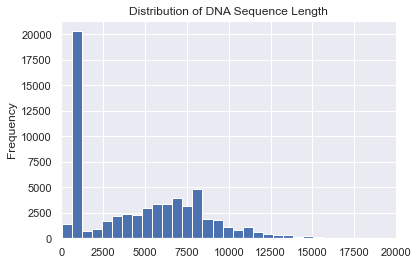

In [4]:
sequence_lengths.plot(kind='hist',
                     title= 'Distribution of DNA Sequence Length', 
                     bins = 100,
                     xlim = (0, 20000))   # Suppress a bar longer than 20,000

In [5]:
###  Exclude the 0th column which is the DNA Sequence

train_values.iloc[:, 1:].apply(pd.value_counts)

,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0.0,19590,60506,48706,62078,58592,18750,57313,50059,61841,61285,...,61417,61478,36890,57732,61978,62322,56381,61949,55170,61742
1.0,43427,2511,14311,939,4425,44267,5704,12958,1176,1732,...,1600,1539,26127,5285,1039,695,6636,1068,7847,1275


Text(0.5, 0, 'Proportion of sequences')

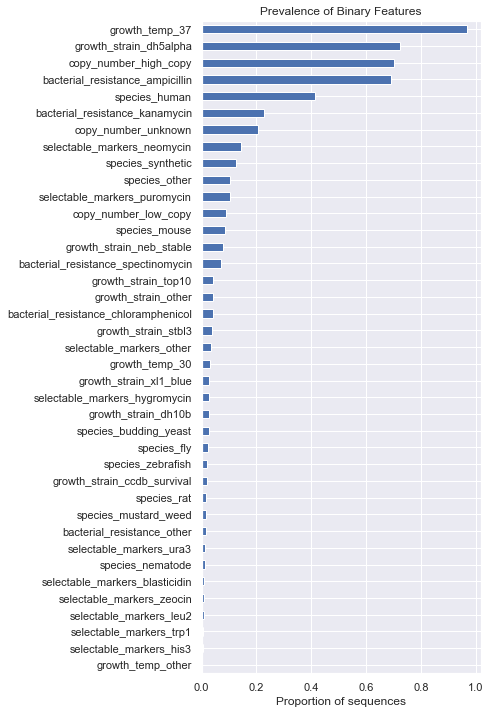

In [6]:
sorted_binary_features = train_values.iloc[:, 1:].mean().sort_values()

ax = sorted_binary_features.plot(kind = 'barh',
                                stacked = True,
                                figsize = (5,12),
                                title   = 'Prevalence of Binary Features')
ax.set_xlabel('Proportion of sequences')

#### 120 Explore the Test Data

In [7]:
test_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,AGATCTATACATTGAATCAATATTGGCAATTAGCCATATTAGTCAT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,GCGCGCGTTGACATTGATTATTGACTAGTTATTAATAGTAATCAAT...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,GCTTAAGCGGTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTG...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,ATGATGATGATGTCCCTGAACAGCAAGCAGGCGTTTAGCATGCCGC...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,GGTACCGAGCTCTTACGCGTGCTAGCCATACTATCAGCCACTTGTG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
test_values.sequence.apply(len).describe()

count    18830.000000
mean      4869.163091
std       3984.134972
min          1.000000
25%        894.000000
50%       4729.500000
75%       7339.500000
max      32759.000000
Name: sequence, dtype: float64

##### 130 Explore Training Labels

In [17]:
train_labels.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Get the column with the max value in each row

lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns = ['lab_id'])
lab_ids.head()

,lab_id
sequence_id,
9ZIMC,RYUA3GVO
5SAQC,RYUA3GVO
E7QRO,RYUA3GVO
CT5FP,RYUA3GVO
7PTD8,RYUA3GVO


In [19]:
# Get the distribution of lab prevalence in the training set
lab_ids['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

In [20]:
# Sort lab ids by prevalence
(lab_ids['lab_id'].value_counts(normalize = True).sort_values(ascending=False)).head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

### 200 Enrich Data Sets
#### 210 Construct Features from DNA Sequences

In [9]:
bases = set(''.join(train_values.sequence.values))
bases

{'A', 'C', 'G', 'N', 'T'}

In [10]:
from itertools import permutations

n = 4
subsequences = [''.join(permutation) for permutation in permutations(bases, r=n)]

In [11]:
print(f"Number of subsequences: {len(subsequences)}")
subsequences[:10]

Number of subsequences: 120


['CGTA',
 'CGTN',
 'CGAT',
 'CGAN',
 'CGNT',
 'CGNA',
 'CTGA',
 'CTGN',
 'CTAG',
 'CTAN']

In [26]:
# Example of built-in count method on strings
# Because it's non-overlapping, "atta" is only counted twice
"gattattattaca".count("atta")

2

### 210 Counting the Subsequences

In [12]:
def get_ngram_features(data, subsequences):
    """Generates counts for each subsequence.
    
    Args:
        data (DataFrame): The data you want to create features from. Must subsequences (list): A list of subsequences to count
        
    Returns:
        DataFrame: A DataFrame with one column for each subsequence
    """
    
    features = pd.DataFrame(index=data.index)
    for subseq in subsequences:
        features[subseq] = data.sequence.str.count(subseq)
    return features

In [13]:
# Calculate n-gram features on our training set
ngram_features = get_ngram_features(train_values, subsequences)
ngram_features.head()

,CGTA,CGTN,CGAT,CGAN,CGNT,CGNA,CTGA,CTGN,CTAG,CTAN,...,NTGC,NTGA,NTAC,NTAG,NACG,NACT,NAGC,NAGT,NATC,NATG
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,14,0,17,0,0,0,44,0,13,0,...,0,0,0,0,0,0,0,0,0,0
5SAQC,0,0,0,0,0,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
E7QRO,0,0,1,1,0,0,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0
CT5FP,1,0,0,0,0,0,8,0,6,0,...,0,0,0,0,0,0,0,0,0,0
7PTD8,2,0,1,0,0,0,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
ngram_features.shape

(63017, 120)

In [16]:
all_features = ngram_features.join(train_values.drop('sequence', axis=1))

all_features.head()

,CGTA,CGTN,CGAT,CGAN,CGNT,CGNA,CTGA,CTGN,CTAG,CTAN,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,14,0,17,0,0,0,44,0,13,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0,0,0,0,0,0,6,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0,0,1,1,0,0,2,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,1,0,0,0,0,0,8,0,6,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,2,0,1,0,0,0,4,0,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
all_features.shape

(63017, 159)

### 300 Processing Top Ten Metric

In [17]:
def top10_accuracy_scorer(estimator, X, y):
    """A custom scorer that evaluates a model on whether the correct label the top 10 most probably predictions.
    
    Args:
        estimatory (sklearn estimator): The skLearn model that should be evaluatioed 
        X (numpy array): The validation data.
        y (numpy array): The ground truth lables.
        
    Returns:
        float: Accuracy of the model as defined by the proportion of prediction in which the correct label was in Top 10
    """
    # predict the probabilities across all possible labels for rows in our training set
    probas = estimator.predict_proba(X)
    
    # get the indices for top 10 predictions for each row; these are these are the last ten in each row
    # Note: We use argpartition, which is O(n), vs argsort, which uses the quicksort algorithm 
    # by default and is O(n^2) in the worst case. We can do this because we only need the top ten
    # partitioned, not in sorted order.
    
    # Documentation: https://numpy.org/doc/1.18/reference/generated/numpy.argpartition.html
    top10_idx = np.argpartition(probas, -10, axis=1)[:, -10:]
    
    # index into the classes list using the top ten indices to get the class names
    top10_preds = estimator.classes_[top10_idx]

    # check if y-true is in top 10 for each set of predictions
    mask = top10_preds == y.reshape((y.size, 1))
    
    # take the mean
    top_10_accuracy = mask.any(axis=1).mean()
 
    return top_10_accuracy

### 400 ML Model
#### 410 Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Rename our feature array
X = all_features

# Create our labels
y = lab_ids.values.ravel()

In [20]:
# Instantiate our Random Forest Classifier; defaults 'gini' impurity, boostrap=True, 
rf = RandomForestClassifier(
    n_jobs       = 4,          # number of jobs to run
    n_estimators = 150,        # number of trees in the forest
    class_weight = 'balanced', # balance classes
    max_depth    = 3,          # shallow tree depth to prevent overfitting
    random_state = 0           # set a seed for reproducibility
)

# fit our model
rf.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=150,
                       n_jobs=4, random_state=0)

In [21]:
rf.score(X, y)

0.13993049494580828

In [22]:
top10_accuracy_scorer(rf, X, y)

0.38021486265610865

### 500 Make Predictions

In [60]:
test_values.isnull().sum()

sequence                                 0
bacterial_resistance_ampicillin         14
bacterial_resistance_chloramphenicol    14
bacterial_resistance_kanamycin          14
bacterial_resistance_other              14
bacterial_resistance_spectinomycin      14
copy_number_high_copy                   14
copy_number_low_copy                    14
copy_number_unknown                     14
growth_strain_ccdb_survival             14
growth_strain_dh10b                     14
growth_strain_dh5alpha                  14
growth_strain_neb_stable                14
growth_strain_other                     14
growth_strain_stbl3                     14
growth_strain_top10                     14
growth_strain_xl1_blue                  14
growth_temp_30                          14
growth_temp_37                          14
growth_temp_other                       14
selectable_markers_blasticidin          14
selectable_markers_his3                 14
selectable_markers_hygromycin           14
selectable_

In [77]:
test_values_filled = test_values.fillna(0)
#test_values_filled = test_values.dropna(0)
test_values_filled.isnull().sum()

sequence                                0
bacterial_resistance_ampicillin         0
bacterial_resistance_chloramphenicol    0
bacterial_resistance_kanamycin          0
bacterial_resistance_other              0
bacterial_resistance_spectinomycin      0
copy_number_high_copy                   0
copy_number_low_copy                    0
copy_number_unknown                     0
growth_strain_ccdb_survival             0
growth_strain_dh10b                     0
growth_strain_dh5alpha                  0
growth_strain_neb_stable                0
growth_strain_other                     0
growth_strain_stbl3                     0
growth_strain_top10                     0
growth_strain_xl1_blue                  0
growth_temp_30                          0
growth_temp_37                          0
growth_temp_other                       0
selectable_markers_blasticidin          0
selectable_markers_his3                 0
selectable_markers_hygromycin           0
selectable_markers_leu2           

In [64]:
#test_ngram_features = get_ngram_features(test_values, subsequences)
test_ngram_features = get_ngram_features(test_values_filled, subsequences)
all_test_features   = test_ngram_features.join(test_values_filled.drop('sequence', axis=1))

In [65]:
###  Visualize the building blocks to "all_test_features" and "all_test_features"

#test_values.describe()

#test_ngram_features.describe()

all_test_features.describe()

,NACT,NACG,NATC,NATG,NAGC,NAGT,NCAT,NCAG,NCTA,NCTG,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
count,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,...,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.000000,18830.00000
mean,0.006160,0.004620,0.006213,0.005258,0.006213,0.004620,0.005364,0.005789,0.004249,0.009241,...,0.031545,0.023686,0.365162,0.094264,0.009878,0.013011,0.120181,0.020340,0.124482,0.02119
std,0.105428,0.080692,0.101576,0.081308,0.099463,0.077331,0.089391,0.095679,0.075616,0.156369,...,0.174791,0.152072,0.481488,0.292204,0.098898,0.113325,0.325181,0.141164,0.330140,0.14402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,4.000000,3.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,3.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [66]:
probas = rf.predict_proba(all_test_features)

# Examine first row
probas[0]

array([0.00088718, 0.00105926, 0.00104933, ..., 0.00090433, 0.00025916,
       0.00017795])

#### 520 Save Submission

In [67]:
submission_format = pd.read_csv(DATA_DIR + 'submission_format_3TFRxH6.csv', index_col='sequence_id')

In [81]:
submission_format.tail()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
4GGKP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37SHJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JS1MB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N642G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BD9BA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
test_values.shape

(18830, 40)

In [76]:
probas

array([[8.87176694e-04, 1.05926202e-03, 1.04932747e-03, ...,
        9.04329813e-04, 2.59161673e-04, 1.77954026e-04],
       [8.80144548e-04, 1.01660273e-03, 1.03382176e-03, ...,
        1.39117929e-03, 2.37448076e-04, 1.69270233e-04],
       [7.47511517e-04, 8.82205040e-04, 8.54909862e-04, ...,
        7.76211977e-04, 3.78339572e-04, 3.42513582e-04],
       ...,
       [4.07658541e-04, 9.66057339e-05, 7.43098062e-05, ...,
        1.53456621e-04, 1.40304705e-03, 1.89663621e-03],
       [4.07658541e-04, 9.66057339e-05, 7.43098062e-05, ...,
        1.53456621e-04, 1.40304705e-03, 1.92834380e-03],
       [3.58782670e-04, 9.49799627e-05, 7.59668330e-05, ...,
        1.54135052e-04, 1.25032136e-03, 2.40988570e-03]])

In [71]:
probas.shape

(18830, 1314)

In [74]:
submission_format.shape

(18816, 1314)

In [78]:
test_values_filled.shape

(18802, 40)

In [70]:
assert submission_format.shape == probas.shape
#assert (rf.classes_ == submission_format.columns).all()

AssertionError: 